In [95]:
import numpy as np 
import pandas as pd 

%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime


from mpl_finance import candlestick_ohlc

In [105]:
file_track = ("data/TSLA.csv")

tsla_df = pd.read_csv(file_track)

tsla_df = tsla_df.set_index('Date')

tsla_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-25,40.580002,40.938000,40.240002,40.467999,40.467999,12225000
2016-10-26,40.200001,40.638000,40.020000,40.448002,40.448002,28164000
2016-10-27,42.268002,42.740002,40.330002,40.801998,40.801998,65468500
2016-10-28,40.799999,41.063999,39.966000,39.993999,39.993999,21400500
2016-10-31,40.498001,40.498001,39.161999,39.546001,39.546001,23461500
...,...,...,...,...,...,...
2021-10-18,851.789978,875.260010,851.469971,870.109985,870.109985,24207200
2021-10-19,877.530029,877.950012,862.510010,864.270020,864.270020,17381100
2021-10-20,865.349976,869.489990,857.380005,865.799988,865.799988,14032100


In [106]:
tsla_df.index = pd.to_datetime(tsla_df.index)

In [107]:
tsla_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-25,40.580002,40.938000,40.240002,40.467999,40.467999,12225000
2016-10-26,40.200001,40.638000,40.020000,40.448002,40.448002,28164000
2016-10-27,42.268002,42.740002,40.330002,40.801998,40.801998,65468500
2016-10-28,40.799999,41.063999,39.966000,39.993999,39.993999,21400500
2016-10-31,40.498001,40.498001,39.161999,39.546001,39.546001,23461500
...,...,...,...,...,...,...
2021-10-18,851.789978,875.260010,851.469971,870.109985,870.109985,24207200
2021-10-19,877.530029,877.950012,862.510010,864.270020,864.270020,17381100
2021-10-20,865.349976,869.489990,857.380005,865.799988,865.799988,14032100


In [108]:
tsla_df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

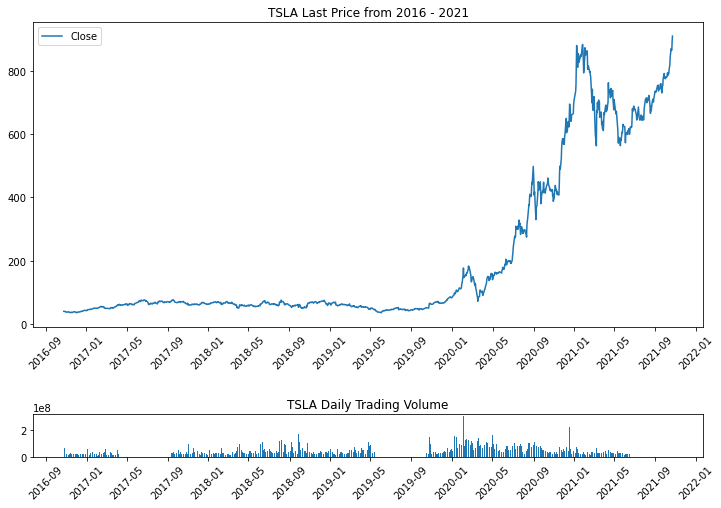

In [121]:
# The top plot consisting of daily closing prices 

top = plt.subplot2grid((4,4), (0,0), rowspan = 3, colspan = 4)
top.plot(tsla_df.index, tsla_df['Close'], label = 'Close')

plt.title("TSLA Last Price from 2016 - 2021")
plt.legend(loc = 2)
plt.xticks(rotation = 45)

top.xaxis.set_major_locator(mdates.MonthLocator(interval=4))

formatter = mdates.DateFormatter('%Y-%m')
top.xaxis.set_major_formatter(formatter)

# The bottom plot consisting of daily trading volume 

bottom = plt.subplot2grid((4, 4), (3, 0), rowspan = 1, colspan = 4)
bottom.bar(tsla_df.index, tsla_df["Volume"])

plt.title("TSLA Daily Trading Volume")
plt.xticks(rotation = 45)
bottom.xaxis.set_major_locator(mdates.MonthLocator(interval=4))

bottom.xaxis.set_major_formatter(formatter)

plt.gcf().set_size_inches(12, 8)

plt.subplots_adjust(hspace = 2.0)



##### daily_changes = tsla_df['Close'].pct_change(periods = 1)
daily_changes.plot(figsize = (12, 8), color = '#d65f5f', label = "Close");
plt.title("TSLA Daily Percentage Returns from 2016 - 2021");


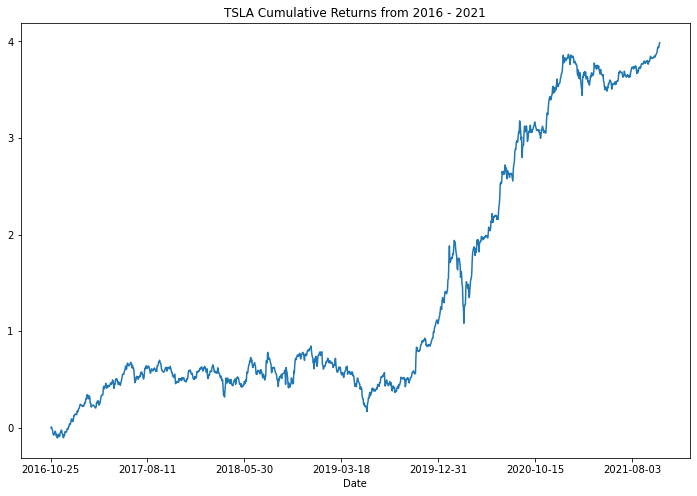

In [130]:
df_cumsum = daily_changes.cumsum()

df_cumsum.plot(figsize = (12, 8))
plt.title("TSLA Cumulative Returns from 2016 - 2021");

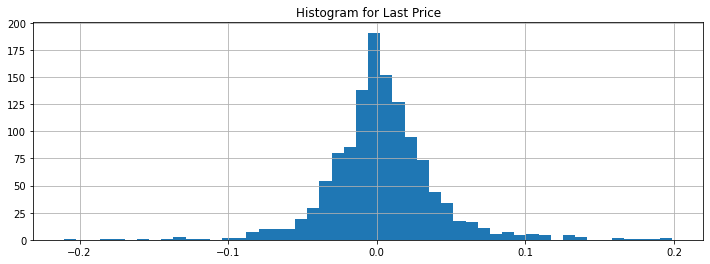

In [125]:
daily_changes.hist(bins = 50, figsize= (12, 4));
plt.title("Histogram for Last Price");

In [136]:
daily_changes.describe()

count    1257.000000
mean        0.003171
std         0.037300
min        -0.210628
25%        -0.014474
50%         0.001606
75%         0.019409
max         0.198949
Name: Close, dtype: float64

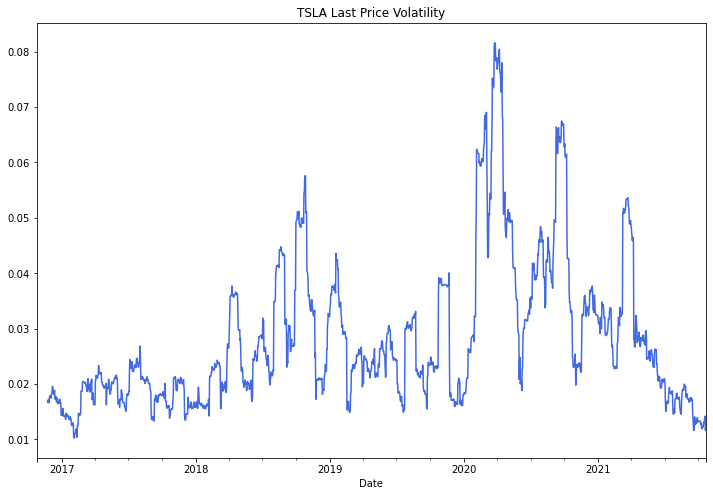

In [46]:


df_filled = tsla_df['Close'].asfreq('D', method = 'ffill')
df_returns = df_filled.pct_change()
df_std = df_returns.rolling(window = 30).std()
df_std.plot(figsize = (12, 8), color = 'royalblue');

plt.title('TSLA Last Price Volatility');


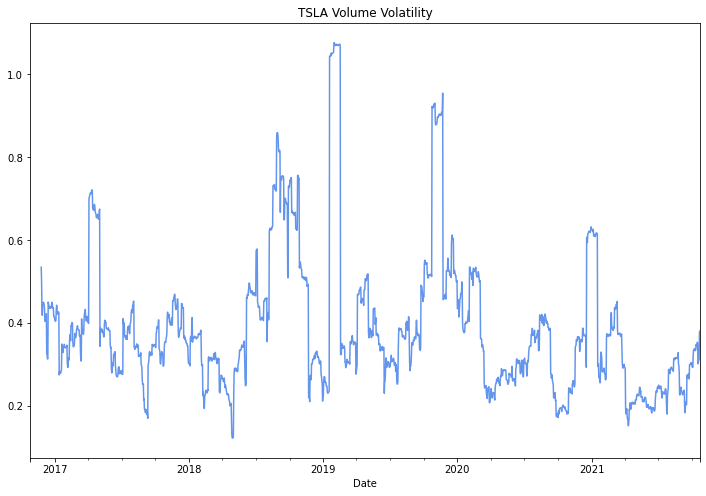

In [35]:

df_filled = tsla_df['Volume'].asfreq('D', method = 'ffill')
df_returns = df_filled.pct_change()
df_std = df_returns.rolling(window = 30, min_periods = 30).std()
df_std.plot(figsize = (12, 8), color ='cornflowerblue');

plt.title('TSLA Volume Volatility');


In [83]:

df_subset = tsla_df[tsla_df.index > '2021-01-01']

df_subset

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2021-01-04,719.460022,744.489990,717.190002,729.770020,729.770020,48638200,18631.0
2021-01-05,723.659973,740.840027,719.200012,735.109985,735.109985,32245200,18632.0
2021-01-06,758.489990,774.000000,749.099976,755.979980,755.979980,44700000,18633.0
2021-01-07,777.630005,816.989990,775.200012,816.039978,816.039978,51498900,18634.0
2021-01-08,856.000000,884.489990,838.390015,880.020020,880.020020,75055500,18635.0
...,...,...,...,...,...,...,...
2021-10-18,851.789978,875.260010,851.469971,870.109985,870.109985,24207200,18918.0
2021-10-19,877.530029,877.950012,862.510010,864.270020,864.270020,17381100,18919.0
2021-10-20,865.349976,869.489990,857.380005,865.799988,865.799988,14032100,18920.0


/Users/abdullahberakucuk/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


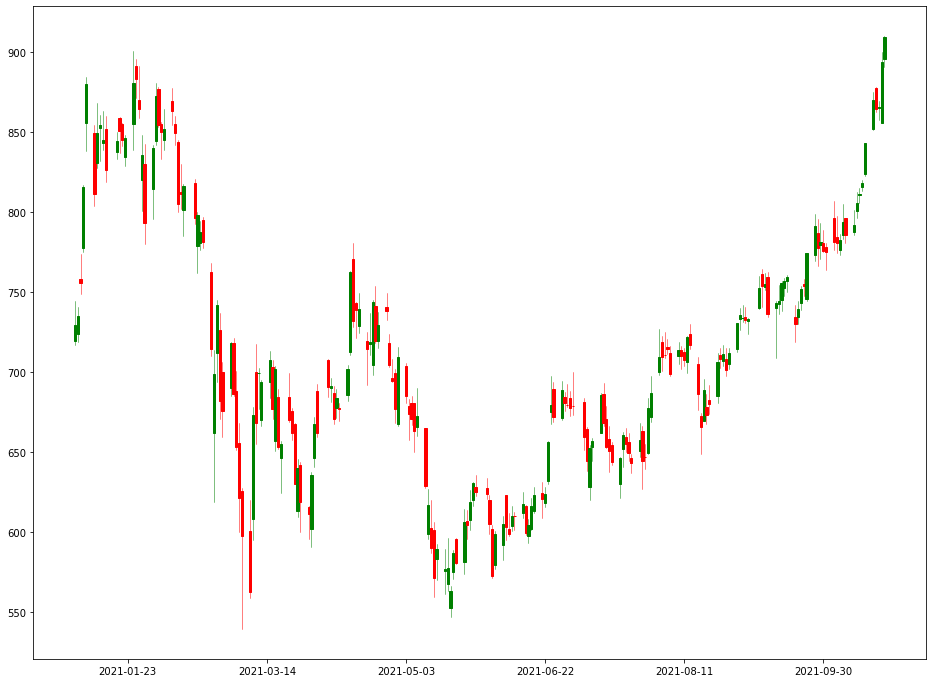

In [86]:
df_subset['Date'] = df_subset.index.map(mdates.date2num)

df_ohlc = df_subset[["Date", "Open", "High", "Low", "Close"]]

figure, ax = plt.subplots(figsize = (16, 12))
formatter = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(formatter)
candlestick_ohlc(ax,
                df_ohlc.values,
                width = 0.8,
                colorup = 'green',
                colordown = 'red')

plt.show()
